<a href="https://colab.research.google.com/github/OrlandoPadron/FSI-Red_Convolutiva/blob/master/Copia_de_Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocedor de lengua de signos

Vamos a desarrollar una red que reconozca lengua de signos. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este *notebook*. Google nos solicitará permiso, tenemos que copiar y pegar el código que nos suministra.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecuación / Cambiar tipo de entorno de ejecución**

dogs_and_cats  Sign-Language


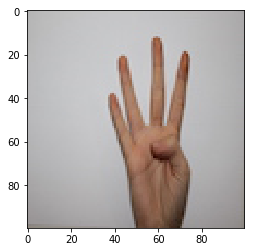

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Sign-Language/4/IMG_1132.JPG', 'r')
imshow(np.asarray(pil_im))



In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Primer modelo

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Sign-Language'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Sign-Language'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 20

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)

Found 2062 images belonging to 10 classes.
Found 2062 images belonging to 10 classes.
Epoch 1/20
100/100 [==============================] - 97s 965ms/step - loss: 2.3896 - acc: 0.1890 - val_loss: 1.8808 - val_acc: 0.4048
Epoch 2/20
100/100 [==============================] - 94s 940ms/step - loss: 1.7700 - acc: 0.4075 - val_loss: 1.0522 - val_acc: 0.6564
Epoch 3/20
100/100 [==============================] - 94s 936ms/step - loss: 1.3520 - acc: 0.5365 - val_loss: 0.7755 - val_acc: 0.7712
Epoch 4/20
100/100 [==============================] - 94s 938ms/step - loss: 1.0997 - acc: 0.6116 - val_loss: 0.7463 - val_acc: 0.7645
Epoch 5/20
100/100 [==============================] - 95s 946ms/step - loss: 1.0323 - acc: 0.6495 - val_loss: 0.5552 - val_acc: 0.8200
Epoch 6/20
100/100 [==============================] - 94s 936ms/step - loss: 0.9612 - acc: 0.6730 - val_loss: 0.4814 - val_acc: 0.8559
Epoch 7/20
100/100 [==============================] - 93s 930ms/step - loss: 0.8675 - acc: 0.7205 - val_

#NUEVO DATASET
Añadimos un nuevo dataset (Dataset de Perros y Gatos). Dense = 2 por el número de clases de nuestro dataset (Perro/Gatos).

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 20

model.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=2000,
)

Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
200/200 [==============================] - 1067s 5s/step - loss: 0.7549 - acc: 0.5500 - val_loss: 0.6582 - val_acc: 0.6151
Epoch 2/20
200/200 [==============================] - 269s 1s/step - loss: 0.6516 - acc: 0.6355 - val_loss: 0.7951 - val_acc: 0.5458
Epoch 3/20
200/200 [==============================] - 269s 1s/step - loss: 0.6042 - acc: 0.6800 - val_loss: 0.6013 - val_acc: 0.6896
Epoch 4/20
200/200 [==============================] - 269s 1s/step - loss: 0.5586 - acc: 0.7222 - val_loss: 0.5511 - val_acc: 0.7135
Epoch 5/20
200/200 [==============================] - 267s 1s/step - loss: 0.5340 - acc: 0.7423 - val_loss: 0.5386 - val_acc: 0.7156
Epoch 6/20
200/

# Probando con clase 'binary'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 20

model.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=2000,
)

Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.
Epoch 1/20
200/200 [==============================] - 794s 4s/step - loss: 0.7250 - acc: 0.5443 - val_loss: 0.6547 - val_acc: 0.5929
Epoch 2/20
200/200 [==============================] - 278s 1s/step - loss: 0.6457 - acc: 0.6287 - val_loss: 0.6223 - val_acc: 0.6626
Epoch 3/20
200/200 [==============================] - 282s 1s/step - loss: 0.5957 - acc: 0.6885 - val_loss: 0.5620 - val_acc: 0.7154
Epoch 4/20
200/200 [==============================] - 279s 1s/step - loss: 0.5623 - acc: 0.7075 - val_loss: 0.5511 - val_acc: 0.7247
Epoch 5/20
200/200 [==============================] - 276s 1s/step - loss: 0.5233 - acc: 0.7495 - val_loss: 0.5450 - val_acc: 0.7206
Epoch 6/20
200/200 [==============================] - 273s 1s/step - loss: 0.5035 - acc: 0.7568 - val_loss: 0.5469 - val_acc: 0.7264
Epoch 7/20
200/200 [==============================] - 266s 1s/step - loss: 0.4761 - acc: 0.7703 - val_loss: 0.5052 - v